# Data Wrangling; Prisoners Data Set

This section is for cleaning the dataset for prisoner statistics from https://www.icpsr.umich.edu/web/NACJD/studies/37639/versions/V1/datadocumentation into a data frame for prisoner demographics for all U.S. states combined per year. 
    
Data file source:
United States. Bureau of Justice Statistics. National Prisoner Statistics,
[United States], 1978-2018. ICPSR37639-v1. Ann Arbor, MI: Inter-university
Consortium for Political and Social Research [distributor], 2020-07-23.
http://doi.org/10.3886/ICPSR37639.v1
    


In [3]:
# Import needed libraries (for this step and eventual visualizations)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in raw demographics file.  Contains an observation for each state(51 lines each incl'DC), federal total(1 line), 
# state total (1 line) and combined state and federal (1 line) for 41 years (1978-2018). So 41*54=2214 observations total.
demographics_df = pd.read_csv("37639-0001-Data.tsv", sep="\t")
demographics_df

,YEAR,STATEID,STATE,REGION,CUSGT1M,CUSGT1F,CUSLT1M,CUSLT1F,CUSUNSM,CUSUNSF,...,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF
0,1978,1,AL,3,-2,-2,-2,-2,-2,-2,...,-1,-1,6,0,0,0,-1,-1,-9,-9
1,1978,2,AK,4,-2,-2,-2,-2,-2,-2,...,-1,-1,0,0,0,0,-1,-1,-9,-9
2,1978,4,AZ,4,-2,-2,-2,-2,-2,-2,...,-1,-1,5,0,0,0,-1,-1,-9,-9
3,1978,5,AR,3,-2,-2,-2,-2,-2,-2,...,-1,-1,0,0,0,0,-1,-1,-9,-9
4,1978,6,CA,4,-2,-2,-2,-2,-2,-2,...,-1,-1,0,0,43,1,-1,-1,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2018,55,WI,2,20796,1505,532,39,656,48,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2210,2018,56,WY,4,1768,285,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2211,2018,60,ST,7,1011149,79801,13192,3014,11460,1438,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2212,2018,70,US,5,1139093,89976,16081,3521,20891,1958,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [3]:
# Our purposes will only use the total combined state and federal, which is STATEID=70. 
# So should have 41 observations total, one for each year from 1978-2018.
demo_by_year_df = demographics_df[demographics_df["STATEID"]==70]
# display all columns for better verifications of changes as they are made
pd.set_option("display.max_columns", None) 

demo_by_year_df

,YEAR,STATEID,STATE,REGION,CUSGT1M,CUSGT1F,CUSLT1M,CUSLT1F,CUSUNSM,CUSUNSF,CUSTOTM,CUSTOTF,CUSGT1T,CUSLT1T,CUSUNST,CUSTOTT,CNOPRIVM,CNOPRIVF,CWPRIVM,CWPRIVF,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,LFM,LFF,LFINCLM,LFINCLF,LFCROWDM,LFCROWDF,LFCRSTM,LFCRSTF,LFCRINCM,LFCRINCF,FEDM,FEDF,OTHSTM,OTHSTF,FACINCLM,FACINCLF,FACROWDM,FACROWDF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,CAPRATEM,CAPRATEF,CAPOPM,CAPOPF,CAPDESM,CAPDESF,CAPRATET,CAPOPT,CAPDEST,HIVTEST,HIVINC,HIVCUR,HIVREL,HIVRAN,HIVCERT,HIVHIGH,HIVREQ,HIVORD,HIVCLIN,HIVINCID,HIVOTH,HIVNOCUS,HIVCUSME,ADHIVTST,CONSTYPE,HIVEXTST,HIVASYMM,HIVASYMF,HIVASYMT,HIVLESSM,HIVLESSF,HIVLESST,AIDSCONM,AIDSCONF,AIDSCONT,HIVATOTM,HIVATOTF,HIVATOTT,CUSLT18M,CUSLT18F,CUSCTZNM,CUSCTZNF,NCITZTOTM,NCITZTOTF,NCITZGT1M,NCITZGT1F,NCITZLE1M,NCITZLE1F,NCITZUNSM,NCITZUNSF,NCITZSELF,NCITZDOCS,NCITZVERIF,DTHEXECM,DTHEXECF,DTHILLNM,DTHILLNF,DTHAIDSM,DTHAIDSF,DTHSUICM,DTHSUICF,DTHACCM,DTHACCF,DTHHOMIM,DTHHOMIF,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF
52,1978,70,US,5,-2,-2,-2,-2,-2,-2,-2,-2,284149,7040,4861,296050,-1,-1,-1,-1,282813,11583,7737,687,3980,476,294530,12746,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6618,156,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,151534,5674,136893,6483,15081,633,2423,161,-1,-1,-1,-1,667,32,-1,-1,0,0,2365,370,293882,12720,146021,6218,132780,5869,-1,-1,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,-1,-1,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,-1,-1,897,75,6275,403,-1,-1,3907,262,1893,191,5723,633,145574,8910,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,276,12,-1,-1,62,1,16,0,-1,-1,-1,-1,89,0,170,6,-1,-1,0,0
106,1979,70,US,5,-2,-2,-2,-2,-2,-2,-2,-2,291610,7903,5076,304589,-1,-1,-1,-1,289465,12005,7705,659,4292,331,301462,12995,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6318,179,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,155803,5839,138776,6607,22329,864,2751,177,-1,-1,-1,-1,717,32,-1,-1,0,0,3033,271,301080,12926,186313,8083,92438,3980,-1,-1,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512,533,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,-1,-1,0,0,0,0,7689,552,2629,304,1742,162,7565,919,156425,9707,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,0,301,11,-1,-1,83,1,20,0,-1,-1,-1,-1,84,0,177,2,-1,-1,0,0
160,1980,70,US,5,-2,-2,-2,-2,-2,-2,-2,-2,304692,7991,6915,319598,-1,-1,-1,-1,303633,12331,8489,639,4269,450,316401,13420,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6229,131,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,163083,6191,143700,6549,24451,795,2853,158,-1,-1,-1,-1,824,18,-1,-1,0,0,4977,342,315437,13258,206527,8913,84459,3550,-1,-1,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477,523,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,-1,-1,0,0,0,0,8082,526,2689,198,1760,152,6104,721,160094,9732,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

Note: the demographic data comes from the Bureau of Justice Statistics website (bjs.gov), using the tool:
Corrections Statistical Analysis Tool (CSAT) - Prisoners

From the FAQ section under this tool:

What is the difference between custody and jurisdiction counts?

Between 1926 and 1976, the official measure of the prison population was the number of inmates in the custody of state or federal correctional officials. State and federal reporting officials were instructed to count all prisoners physically housed under their authority, regardless of whether they or some other entity had legal authority over the inmates.

As states and the Federal Bureau of Prisons increased their use of local jails and interstate compacts to house inmates, NPS began asking states to report a count of inmates under the jurisdiction or legal authority of state and federal adult correctional officials in addition to their custody counts.

Since 1977, the jurisdiction count has been the preferred measure of the prison population. This count includes all state and federal inmates held in the physical custody of public or private prisons, inmates held in jail facilities located either inside or outside of the state of legal responsibility, and other inmates who may be temporarily out to court or in transit from the jurisdiction of legal authority to the custody of a confinement facility outside that jurisdiction.

In [4]:
# Given the statement from the Bureau of Justice Statistics website that "Since 1977, the jurisdiction count has been the
# preferred measure of the prison population.": drop 16 columns from demo_by_year_df related only to custody.
demo_by_year_df = demo_by_year_df.drop(demo_by_year_df.iloc[:, 4:20], axis = 1)
demo_by_year_df

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,LFM,LFF,LFINCLM,LFINCLF,LFCROWDM,LFCROWDF,LFCRSTM,LFCRSTF,LFCRINCM,LFCRINCF,FEDM,FEDF,OTHSTM,OTHSTF,FACINCLM,FACINCLF,FACROWDM,FACROWDF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,CAPRATEM,CAPRATEF,CAPOPM,CAPOPF,CAPDESM,CAPDESF,CAPRATET,CAPOPT,CAPDEST,HIVTEST,HIVINC,HIVCUR,HIVREL,HIVRAN,HIVCERT,HIVHIGH,HIVREQ,HIVORD,HIVCLIN,HIVINCID,HIVOTH,HIVNOCUS,HIVCUSME,ADHIVTST,CONSTYPE,HIVEXTST,HIVASYMM,HIVASYMF,HIVASYMT,HIVLESSM,HIVLESSF,HIVLESST,AIDSCONM,AIDSCONF,AIDSCONT,HIVATOTM,HIVATOTF,HIVATOTT,CUSLT18M,CUSLT18F,CUSCTZNM,CUSCTZNF,NCITZTOTM,NCITZTOTF,NCITZGT1M,NCITZGT1F,NCITZLE1M,NCITZLE1F,NCITZUNSM,NCITZUNSF,NCITZSELF,NCITZDOCS,NCITZVERIF,DTHEXECM,DTHEXECF,DTHILLNM,DTHILLNF,DTHAIDSM,DTHAIDSF,DTHSUICM,DTHSUICF,DTHACCM,DTHACCF,DTHHOMIM,DTHHOMIF,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF
52,1978,70,US,5,282813,11583,7737,687,3980,476,294530,12746,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6618,156,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,151534,5674,136893,6483,15081,633,2423,161,-1,-1,-1,-1,667,32,-1,-1,0,0,2365,370,293882,12720,146021,6218,132780,5869,-1,-1,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,-1,-1,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,-1,-1,897,75,6275,403,-1,-1,3907,262,1893,191,5723,633,145574,8910,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,276,12,-1,-1,62,1,16,0,-1,-1,-1,-1,89,0,170,6,-1,-1,0,0
106,1979,70,US,5,289465,12005,7705,659,4292,331,301462,12995,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6318,179,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,155803,5839,138776,6607,22329,864,2751,177,-1,-1,-1,-1,717,32,-1,-1,0,0,3033,271,301080,12926,186313,8083,92438,3980,-1,-1,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512,533,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,-1,-1,0,0,0,0,7689,552,2629,304,1742,162,7565,919,156425,9707,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,0,301,11,-1,-1,83,1,20,0,-1,-1,-1,-1,84,0,177,2,-1,-1,0,0
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6229,131,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,163083,6191,143700,6549,24451,795,2853,158,-1,-1,-1,-1,824,18,-1,-1,0,0,4977,342,315437,13258,206527,8913,84459,3550,-1,-1,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477,523,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,-1,-1,0,0,0,0,8082,526,2689,198,1760,152,6104,721,160094,9732,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,328,8,-1,-1,79,1,29,1,-1,-1,-1,-1,126,1,152,2,-1,-1,0,0
214,1981,70,US,5,339375,14298,8209,751,6809,488,354393,15537,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6693,207,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,183202,7301,160442,7687,28211,876,3116,19

In [5]:
# Add new field: Total number of prisoners under US (combined state and fed) jurisdiction as of the end of the year
demo_by_year_df['JURUSTOTAL'] = demo_by_year_df['JURTOTM'] + demo_by_year_df['JURTOTF']
demo_by_year_df

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,LFM,LFF,LFINCLM,LFINCLF,LFCROWDM,LFCROWDF,LFCRSTM,LFCRSTF,LFCRINCM,LFCRINCF,FEDM,FEDF,OTHSTM,OTHSTF,FACINCLM,FACINCLF,FACROWDM,FACROWDF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,CAPRATEM,CAPRATEF,CAPOPM,CAPOPF,CAPDESM,CAPDESF,CAPRATET,CAPOPT,CAPDEST,HIVTEST,HIVINC,HIVCUR,HIVREL,HIVRAN,HIVCERT,HIVHIGH,HIVREQ,HIVORD,HIVCLIN,HIVINCID,HIVOTH,HIVNOCUS,HIVCUSME,ADHIVTST,CONSTYPE,HIVEXTST,HIVASYMM,HIVASYMF,HIVASYMT,HIVLESSM,HIVLESSF,HIVLESST,AIDSCONM,AIDSCONF,AIDSCONT,HIVATOTM,HIVATOTF,HIVATOTT,CUSLT18M,CUSLT18F,CUSCTZNM,CUSCTZNF,NCITZTOTM,NCITZTOTF,NCITZGT1M,NCITZGT1F,NCITZLE1M,NCITZLE1F,NCITZUNSM,NCITZUNSF,NCITZSELF,NCITZDOCS,NCITZVERIF,DTHEXECM,DTHEXECF,DTHILLNM,DTHILLNF,DTHAIDSM,DTHAIDSF,DTHSUICM,DTHSUICF,DTHACCM,DTHACCF,DTHHOMIM,DTHHOMIF,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF,JURUSTOTAL
52,1978,70,US,5,282813,11583,7737,687,3980,476,294530,12746,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6618,156,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,151534,5674,136893,6483,15081,633,2423,161,-1,-1,-1,-1,667,32,-1,-1,0,0,2365,370,293882,12720,146021,6218,132780,5869,-1,-1,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,-1,-1,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,-1,-1,897,75,6275,403,-1,-1,3907,262,1893,191,5723,633,145574,8910,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,276,12,-1,-1,62,1,16,0,-1,-1,-1,-1,89,0,170,6,-1,-1,0,0,307276
106,1979,70,US,5,289465,12005,7705,659,4292,331,301462,12995,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6318,179,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,155803,5839,138776,6607,22329,864,2751,177,-1,-1,-1,-1,717,32,-1,-1,0,0,3033,271,301080,12926,186313,8083,92438,3980,-1,-1,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512,533,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,-1,-1,0,0,0,0,7689,552,2629,304,1742,162,7565,919,156425,9707,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,0,301,11,-1,-1,83,1,20,0,-1,-1,-1,-1,84,0,177,2,-1,-1,0,0,314457
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6229,131,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,163083,6191,143700,6549,24451,795,2853,158,-1,-1,-1,-1,824,18,-1,-1,0,0,4977,342,315437,13258,206527,8913,84459,3550,-1,-1,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477,523,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,-1,-1,0,0,0,0,8082,526,2689,198,1760,152,6104,721,160094,9732,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,328,8,-1,-1,79,1,29,1,-1,-1,-1,-1,126,1,152,2,-1,-1,0,0,329821
214,1981,70,US,5,339375,14298,8209,751,6809,488,354393,15537,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6693,207,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,183202,73

In [6]:
# Move new column to the right of the two columns whose sum it contains
# pop column,JURUSTOTAL
move_column = demo_by_year_df.pop('JURUSTOTAL')
  
# insert column using insert(position,column_name, move_column) function
demo_by_year_df.insert(12, 'JURUSTOTAL', move_column)
demo_by_year_df.head(15)

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,LFM,LFF,LFINCLM,LFINCLF,LFCROWDM,LFCROWDF,LFCRSTM,LFCRSTF,LFCRINCM,LFCRINCF,FEDM,FEDF,OTHSTM,OTHSTF,FACINCLM,FACINCLF,FACROWDM,FACROWDF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,CAPRATEM,CAPRATEF,CAPOPM,CAPOPF,CAPDESM,CAPDESF,CAPRATET,CAPOPT,CAPDEST,HIVTEST,HIVINC,HIVCUR,HIVREL,HIVRAN,HIVCERT,HIVHIGH,HIVREQ,HIVORD,HIVCLIN,HIVINCID,HIVOTH,HIVNOCUS,HIVCUSME,ADHIVTST,CONSTYPE,HIVEXTST,HIVASYMM,HIVASYMF,HIVASYMT,HIVLESSM,HIVLESSF,HIVLESST,AIDSCONM,AIDSCONF,AIDSCONT,HIVATOTM,HIVATOTF,HIVATOTT,CUSLT18M,CUSLT18F,CUSCTZNM,CUSCTZNF,NCITZTOTM,NCITZTOTF,NCITZGT1M,NCITZGT1F,NCITZLE1M,NCITZLE1F,NCITZUNSM,NCITZUNSF,NCITZSELF,NCITZDOCS,NCITZVERIF,DTHEXECM,DTHEXECF,DTHILLNM,DTHILLNF,DTHAIDSM,DTHAIDSF,DTHSUICM,DTHSUICF,DTHACCM,DTHACCF,DTHHOMIM,DTHHOMIF,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF
52,1978,70,US,5,282813,11583,7737,687,3980,476,294530,12746,307276,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6618,156,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,151534,5674,136893,6483,15081,633,2423,161,-1,-1,-1,-1,667,32,-1,-1,0,0,2365,370,293882,12720,146021,6218,132780,5869,-1,-1,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,-1,-1,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,-1,-1,897,75,6275,403,-1,-1,3907,262,1893,191,5723,633,145574,8910,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,276,12,-1,-1,62,1,16,0,-1,-1,-1,-1,89,0,170,6,-1,-1,0,0
106,1979,70,US,5,289465,12005,7705,659,4292,331,301462,12995,314457,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6318,179,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,155803,5839,138776,6607,22329,864,2751,177,-1,-1,-1,-1,717,32,-1,-1,0,0,3033,271,301080,12926,186313,8083,92438,3980,-1,-1,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512,533,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,-1,-1,0,0,0,0,7689,552,2629,304,1742,162,7565,919,156425,9707,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,0,301,11,-1,-1,83,1,20,0,-1,-1,-1,-1,84,0,177,2,-1,-1,0,0
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,329821,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6229,131,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,163083,6191,143700,6549,24451,795,2853,158,-1,-1,-1,-1,824,18,-1,-1,0,0,4977,342,315437,13258,206527,8913,84459,3550,-1,-1,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477,523,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,-1,-1,0,0,0,0,8082,526,2689,198,1760,152,6104,721,160094,9732,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,328,8,-1,-1,79,1,29,1,-1,-1,-1,-1,126,1,152,2,-1,-1,0,0
214,1981,70,US,5,339375,14298,8209,751,6809,488,354393,15537,369930,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6693,207,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,18

In [7]:
# Add two new fields: 
#Total number of prisoners under US (combined state and fed) jurisdiction admitted during the year
demo_by_year_df['ADMITUSTOTAL'] = demo_by_year_df['ADTOTM'] + demo_by_year_df['ADTOTF']
#Total number of prisoners under US (combined state and fed) jurisdiction released during the year
demo_by_year_df['RELEASEUSTOTAL'] = demo_by_year_df['RLTOTM'] + demo_by_year_df['RLTOTF']
demo_by_year_df

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,LFM,LFF,LFINCLM,LFINCLF,LFCROWDM,LFCROWDF,LFCRSTM,LFCRSTF,LFCRINCM,LFCRINCF,FEDM,FEDF,OTHSTM,OTHSTF,FACINCLM,FACINCLF,FACROWDM,FACROWDF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,CAPRATEM,CAPRATEF,CAPOPM,CAPOPF,CAPDESM,CAPDESF,CAPRATET,CAPOPT,CAPDEST,HIVTEST,HIVINC,HIVCUR,HIVREL,HIVRAN,HIVCERT,HIVHIGH,HIVREQ,HIVORD,HIVCLIN,HIVINCID,HIVOTH,HIVNOCUS,HIVCUSME,ADHIVTST,CONSTYPE,HIVEXTST,HIVASYMM,HIVASYMF,HIVASYMT,HIVLESSM,HIVLESSF,HIVLESST,AIDSCONM,AIDSCONF,AIDSCONT,HIVATOTM,HIVATOTF,HIVATOTT,CUSLT18M,CUSLT18F,CUSCTZNM,CUSCTZNF,NCITZTOTM,NCITZTOTF,NCITZGT1M,NCITZGT1F,NCITZLE1M,NCITZLE1F,NCITZUNSM,NCITZUNSF,NCITZSELF,NCITZDOCS,NCITZVERIF,DTHEXECM,DTHEXECF,DTHILLNM,DTHILLNF,DTHAIDSM,DTHAIDSF,DTHSUICM,DTHSUICF,DTHACCM,DTHACCF,DTHHOMIM,DTHHOMIF,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF,ADMITUSTOTAL,RELEASEUSTOTAL
52,1978,70,US,5,282813,11583,7737,687,3980,476,294530,12746,307276,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6618,156,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,151534,5674,136893,6483,15081,633,2423,161,-1,-1,-1,-1,667,32,-1,-1,0,0,2365,370,293882,12720,146021,6218,132780,5869,-1,-1,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,-1,-1,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,-1,-1,897,75,6275,403,-1,-1,3907,262,1893,191,5723,633,145574,8910,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,276,12,-1,-1,62,1,16,0,-1,-1,-1,-1,89,0,170,6,-1,-1,0,0,162574,154484
106,1979,70,US,5,289465,12005,7705,659,4292,331,301462,12995,314457,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6318,179,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,155803,5839,138776,6607,22329,864,2751,177,-1,-1,-1,-1,717,32,-1,-1,0,0,3033,271,301080,12926,186313,8083,92438,3980,-1,-1,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512,533,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,-1,-1,0,0,0,0,7689,552,2629,304,1742,162,7565,919,156425,9707,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,0,301,11,-1,-1,83,1,20,0,-1,-1,-1,-1,84,0,177,2,-1,-1,0,0,172753,166132
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,329821,-1,-1,-1,-1,-8,-8,-1,-1,-8,-8,6229,131,-1,-1,-8,-8,-1,-1,-1,-1,-8,-8,0,0,163083,6191,143700,6549,24451,795,2853,158,-1,-1,-1,-1,824,18,-1,-1,0,0,4977,342,315437,13258,206527,8913,84459,3550,-1,-1,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477,523,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,-1,-1,0,0,0,0,8082,526,2689,198,1760,152,6104,721,160094,9732,-8,-8,-8,-8,0,0,-8,-8,-8,-8,-8,-8,-8,-8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,328,8,-1,-1,79,1,29,1,-1,-1,-1,-1,126,1,152,2,-1,-1,0,0,182617,169826
214,1981,70,US,5,339375,14298,8209,751,6809,488,354393,15537,369930,-1,-1

In [8]:
# Missing values are denoted by -1, -2, -8 or -9.  Replace these with np.nan
demo_by_year_df = demo_by_year_df.replace([-1, -2, -8, -9], np.nan)
demo_by_year_df

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,LFM,LFF,LFINCLM,LFINCLF,LFCROWDM,LFCROWDF,LFCRSTM,LFCRSTF,LFCRINCM,LFCRINCF,FEDM,FEDF,OTHSTM,OTHSTF,FACINCLM,FACINCLF,FACROWDM,FACROWDF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,CAPRATEM,CAPRATEF,CAPOPM,CAPOPF,CAPDESM,CAPDESF,CAPRATET,CAPOPT,CAPDEST,HIVTEST,HIVINC,HIVCUR,HIVREL,HIVRAN,HIVCERT,HIVHIGH,HIVREQ,HIVORD,HIVCLIN,HIVINCID,HIVOTH,HIVNOCUS,HIVCUSME,ADHIVTST,CONSTYPE,HIVEXTST,HIVASYMM,HIVASYMF,HIVASYMT,HIVLESSM,HIVLESSF,HIVLESST,AIDSCONM,AIDSCONF,AIDSCONT,HIVATOTM,HIVATOTF,HIVATOTT,CUSLT18M,CUSLT18F,CUSCTZNM,CUSCTZNF,NCITZTOTM,NCITZTOTF,NCITZGT1M,NCITZGT1F,NCITZLE1M,NCITZLE1F,NCITZUNSM,NCITZUNSF,NCITZSELF,NCITZDOCS,NCITZVERIF,DTHEXECM,DTHEXECF,DTHILLNM,DTHILLNF,DTHAIDSM,DTHAIDSF,DTHSUICM,DTHSUICF,DTHACCM,DTHACCF,DTHHOMIM,DTHHOMIF,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF,ADMITUSTOTAL,RELEASEUSTOTAL
52,1978,70,US,5,282813,11583,7737,687,3980,476,294530,12746,307276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6618.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,151534,5674,136893,6483,15081,633,2423,161,NaN,NaN,NaN,NaN,667.0,32.0,NaN,NaN,0,0,2365,370,293882,12720,146021.0,6218.0,132780.0,5869.0,NaN,NaN,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,NaN,NaN,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,NaN,NaN,897,75,6275,403,NaN,NaN,3907,262,1893,191,5723,633,145574,8910,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,276.0,12.0,NaN,NaN,62.0,1.0,16.0,0.0,NaN,NaN,NaN,NaN,89.0,0.0,170.0,6.0,NaN,NaN,0.0,0.0,162574,154484
106,1979,70,US,5,289465,12005,7705,659,4292,331,301462,12995,314457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6318.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,155803,5839,138776,6607,22329,864,2751,177,NaN,NaN,NaN,NaN,717.0,32.0,NaN,NaN,0,0,3033,271,301080,12926,186313.0,8083.0,92438.0,3980.0,NaN,NaN,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512.0,533.0,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,NaN,NaN,0,0,0,0,7689.0,552.0,2629,304,1742,162,7565,919,156425,9707,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,301.0,11.0,NaN,NaN,83.0,1.0,20.0,0.0,NaN,NaN,NaN,NaN,84.0,0.0,177.0,2.0,NaN,NaN,0.0,0.0,172753,166132
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,329821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6229.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,163083,6191,143700,6549,24451,795,2853,158,NaN,NaN,NaN,NaN,824.0,18.0,NaN,NaN,0,0,4977,342,315437,13258,206527.0,8913.0,84459.0,3550.0,NaN,NaN,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477.0,523.0,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,NaN,NaN,0,0,0,0,8082.0,526.0,2689,19

In [9]:
# columns 19-36 contain details regarding local facilities, other state facilities or federal facilities.
# Because we are not addressing these differences in our analysis, drop these columns.
demo_by_year_df = demo_by_year_df.drop(demo_by_year_df.iloc[:, 19:37], axis = 1)
demo_by_year_df

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,CAPRATEM,CAPRATEF,CAPOPM,CAPOPF,CAPDESM,CAPDESF,CAPRATET,CAPOPT,CAPDEST,HIVTEST,HIVINC,HIVCUR,HIVREL,HIVRAN,HIVCERT,HIVHIGH,HIVREQ,HIVORD,HIVCLIN,HIVINCID,HIVOTH,HIVNOCUS,HIVCUSME,ADHIVTST,CONSTYPE,HIVEXTST,HIVASYMM,HIVASYMF,HIVASYMT,HIVLESSM,HIVLESSF,HIVLESST,AIDSCONM,AIDSCONF,AIDSCONT,HIVATOTM,HIVATOTF,HIVATOTT,CUSLT18M,CUSLT18F,CUSCTZNM,CUSCTZNF,NCITZTOTM,NCITZTOTF,NCITZGT1M,NCITZGT1F,NCITZLE1M,NCITZLE1F,NCITZUNSM,NCITZUNSF,NCITZSELF,NCITZDOCS,NCITZVERIF,DTHEXECM,DTHEXECF,DTHILLNM,DTHILLNF,DTHAIDSM,DTHAIDSF,DTHSUICM,DTHSUICF,DTHACCM,DTHACCF,DTHHOMIM,DTHHOMIF,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF,ADMITUSTOTAL,RELEASEUSTOTAL
52,1978,70,US,5,282813,11583,7737,687,3980,476,294530,12746,307276,NaN,NaN,NaN,NaN,NaN,NaN,151534,5674,136893,6483,15081,633,2423,161,NaN,NaN,NaN,NaN,667.0,32.0,NaN,NaN,0,0,2365,370,293882,12720,146021.0,6218.0,132780.0,5869.0,NaN,NaN,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,NaN,NaN,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,NaN,NaN,897,75,6275,403,NaN,NaN,3907,262,1893,191,5723,633,145574,8910,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,276.0,12.0,NaN,NaN,62.0,1.0,16.0,0.0,NaN,NaN,NaN,NaN,89.0,0.0,170.0,6.0,NaN,NaN,0.0,0.0,162574,154484
106,1979,70,US,5,289465,12005,7705,659,4292,331,301462,12995,314457,NaN,NaN,NaN,NaN,NaN,NaN,155803,5839,138776,6607,22329,864,2751,177,NaN,NaN,NaN,NaN,717.0,32.0,NaN,NaN,0,0,3033,271,301080,12926,186313.0,8083.0,92438.0,3980.0,NaN,NaN,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512.0,533.0,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,NaN,NaN,0,0,0,0,7689.0,552.0,2629,304,1742,162,7565,919,156425,9707,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,301.0,11.0,NaN,NaN,83.0,1.0,20.0,0.0,NaN,NaN,NaN,NaN,84.0,0.0,177.0,2.0,NaN,NaN,0.0,0.0,172753,166132
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,329821,NaN,NaN,NaN,NaN,NaN,NaN,163083,6191,143700,6549,24451,795,2853,158,NaN,NaN,NaN,NaN,824.0,18.0,NaN,NaN,0,0,4977,342,315437,13258,206527.0,8913.0,84459.0,3550.0,NaN,NaN,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477.0,523.0,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,NaN,NaN,0,0,0,0,8082.0,526.0,2689,198,1760,152,6104,721,160094,9732,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,328.0,8.0,NaN,NaN,79.0,1.0,29.0,1.0,NaN,NaN,NaN,NaN,126.0,1.0,152.0,2.0,NaN,NaN,0.0,0.0

In [10]:
# columns 109-183 contain information we will not be using in our analysis, drop these columns.
demo_by_year_df = demo_by_year_df.drop(demo_by_year_df.iloc[:, 109:184], axis = 1)
demo_by_year_df

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,ADMITUSTOTAL,RELEASEUSTOTAL
52,1978,70,US,5,282813,11583,7737,687,3980,476,294530,12746,307276,NaN,NaN,NaN,NaN,NaN,NaN,151534,5674,136893,6483,15081,633,2423,161,NaN,NaN,NaN,NaN,667.0,32.0,NaN,NaN,0,0,2365,370,293882,12720,146021.0,6218.0,132780.0,5869.0,NaN,NaN,118676,7445,8352,331,11616,524,1500,48,1414,59,2977,210,886,62,5965,435,NaN,NaN,933,54,1004,83,153323,9251,23309,1096,733,58,644,62,3550,388,9935,440,85498,5086,2597,197,NaN,NaN,897,75,6275,403,NaN,NaN,3907,262,1893,191,5723,633,145574,8910,NaN,NaN,NaN,NaN,0,0,NaN,NaN,162574,154484
106,1979,70,US,5,289465,12005,7705,659,4292,331,301462,12995,314457,NaN,NaN,NaN,NaN,NaN,NaN,155803,5839,138776,6607,22329,864,2751,177,NaN,NaN,NaN,NaN,717.0,32.0,NaN,NaN,0,0,3033,271,301080,12926,186313.0,8083.0,92438.0,3980.0,NaN,NaN,123318,7739,9319,330,12545,449,1497,61,1392,75,3102,336,0,0,0,0,7512.0,533.0,237,11,3771,536,162693,10060,24035,1261,482,26,855,95,3811,429,24306,1202,79736,4551,2908,192,NaN,NaN,0,0,0,0,7689.0,552.0,2629,304,1742,162,7565,919,156425,9707,NaN,NaN,NaN,NaN,0,0,NaN,NaN,172753,166132
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,329821,NaN,NaN,NaN,NaN,NaN,NaN,163083,6191,143700,6549,24451,795,2853,158,NaN,NaN,NaN,NaN,824.0,18.0,NaN,NaN,0,0,4977,342,315437,13258,206527.0,8913.0,84459.0,3550.0,NaN,NaN,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477.0,523.0,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,NaN,NaN,0,0,0,0,8082.0,526.0,2689,198,1760,152,6104,721,160094,9732,NaN,NaN,NaN,NaN,0,0,NaN,NaN,182617,169826
214,1981,70,US,5,339375,14298,8209,751,6809,488,354393,15537,369930,NaN,NaN,NaN,NaN,NaN,NaN,183202,7301,160442,7687,28211,876,3116,191,NaN,NaN,NaN,NaN,1124.0,46.0,NaN,NaN,0,0,5451,212,353335,15437,253970.0,11517.0,71154.0,3044.0,NaN,NaN,150741,9531,11969,430,13597,569,3150,151,5640,168,2935,211,0,0,0,0,8651.0,523.0,825,85,3009,78,200517,11747,21933,1053,3150,244,1425,96,4770,517,31181,1680,77169,4725,4100,273,NaN,NaN,0,0,0,0,8941.0,521.0,2246,162,2358,149,7061,410,165110,9845,NaN,NaN,NaN,NaN,0,0,NaN,NaN,212264,174955
268,1982,70,US,5,379075,16441,10027,858,6919,486,396021,17785,413806,NaN,NaN,NaN,NaN,NaN,NaN,206167,8574,180844,8766,36127,1099,3540,218,NaN,NaN,NaN,NaN,1450.0,54.0,NaN,NaN,0,0,4438,311,396439,17923,257874.0,11996.0,102438.0,4828.0,NaN,NaN,166001,11108,13699,479,16309,732,4509,148,2984,143,3176,223,0,0,0,0,8803.0,545.0,938,105,894,38,217313,13521,25823,1450,483,52,1018,87,6931,638,38101,2251,81395,5212,5274,377,NaN,NaN,0,0,0,0,9109.0,518.0,3000,202,2215,162,3061,278,177196,11240,NaN,NaN,NaN,NaN,0,0,NaN,NaN,230834,188436
322,1983,70,US,5,401870,17476,9827,979,6138,565,417835,19020,436855,NaN,NaN,NaN,NaN,NaN,NaN,216522,9380,191020,9196,39744,1344,3833,253,NaN,NaN,NaN,NaN,1503.0,74.0,NaN,NaN,0,0,5206,251,418084,19154,244397.0,11501.0,133943.0,6309.0,NaN,NaN,174887,12521,14001,525,12753,612,8870,368,8026,413,3450,258,0,0,0,0,7942.0,486.0,4134,222,573,20,234636,15425,33708,2205,934,73,1266,121,9165,723,50509,3123,91830,6129,4474,392,NaN,NaN,0,0,0,0,8651.0,515.0,3240,252,5259,322,1702,367,211611,14245,NaN,NaN,NaN,NaN,0,0,NaN,NaN

In [11]:
# Remove rows for 1978 and 1979, see above
demo_by_year_df.drop([52,106], axis=0, inplace = True)
demo_by_year_df

,YEAR,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,ADMITUSTOTAL,RELEASEUSTOTAL
160,1980,70,US,5,303633,12331,8489,639,4269,450,316401,13420,329821,NaN,NaN,NaN,NaN,NaN,NaN,163083,6191,143700,6549,24451,795,2853,158,NaN,NaN,NaN,NaN,824.0,18.0,NaN,NaN,0,0,4977,342,315437,13258,206527.0,8913.0,84459.0,3550.0,NaN,NaN,134021,8101,10259,369,12846,470,2303,89,2396,85,2539,194,0,0,0,0,7477.0,523.0,266,15,640,24,172747,9870,22708,1191,630,68,1223,95,4534,446,28309,1463,79226,4591,4115,268,NaN,NaN,0,0,0,0,8082.0,526.0,2689,198,1760,152,6104,721,160094,9732,NaN,NaN,NaN,NaN,0,0,NaN,NaN,182617,169826
214,1981,70,US,5,339375,14298,8209,751,6809,488,354393,15537,369930,NaN,NaN,NaN,NaN,NaN,NaN,183202,7301,160442,7687,28211,876,3116,191,NaN,NaN,NaN,NaN,1124.0,46.0,NaN,NaN,0,0,5451,212,353335,15437,253970.0,11517.0,71154.0,3044.0,NaN,NaN,150741,9531,11969,430,13597,569,3150,151,5640,168,2935,211,0,0,0,0,8651.0,523.0,825,85,3009,78,200517,11747,21933,1053,3150,244,1425,96,4770,517,31181,1680,77169,4725,4100,273,NaN,NaN,0,0,0,0,8941.0,521.0,2246,162,2358,149,7061,410,165110,9845,NaN,NaN,NaN,NaN,0,0,NaN,NaN,212264,174955
268,1982,70,US,5,379075,16441,10027,858,6919,486,396021,17785,413806,NaN,NaN,NaN,NaN,NaN,NaN,206167,8574,180844,8766,36127,1099,3540,218,NaN,NaN,NaN,NaN,1450.0,54.0,NaN,NaN,0,0,4438,311,396439,17923,257874.0,11996.0,102438.0,4828.0,NaN,NaN,166001,11108,13699,479,16309,732,4509,148,2984,143,3176,223,0,0,0,0,8803.0,545.0,938,105,894,38,217313,13521,25823,1450,483,52,1018,87,6931,638,38101,2251,81395,5212,5274,377,NaN,NaN,0,0,0,0,9109.0,518.0,3000,202,2215,162,3061,278,177196,11240,NaN,NaN,NaN,NaN,0,0,NaN,NaN,230834,188436
322,1983,70,US,5,401870,17476,9827,979,6138,565,417835,19020,436855,NaN,NaN,NaN,NaN,NaN,NaN,216522,9380,191020,9196,39744,1344,3833,253,NaN,NaN,NaN,NaN,1503.0,74.0,NaN,NaN,0,0,5206,251,418084,19154,244397.0,11501.0,133943.0,6309.0,NaN,NaN,174887,12521,14001,525,12753,612,8870,368,8026,413,3450,258,0,0,0,0,7942.0,486.0,4134,222,573,20,234636,15425,33708,2205,934,73,1266,121,9165,723,50509,3123,91830,6129,4474,392,NaN,NaN,0,0,0,0,8651.0,515.0,3240,252,5259,322,1702,367,211611,14245,NaN,NaN,NaN,NaN,0,0,NaN,NaN,250061,225856
376,1984,70,US,5,424193,19205,9339,985,7676,604,441208,20794,462002,NaN,NaN,NaN,NaN,NaN,NaN,229323,10105,199692,9981,46125,1781,4189,285,NaN,NaN,NaN,NaN,2061.0,119.0,NaN,NaN,0,0,6359,328,441624,20818,253839.0,12357.0,141660.0,6680.0,441624.0,20818.0,167833,12585,15762,662,13602,720,10210,448,10039,564,3456,292,0,0,0,0,7664.0,555.0,319,34,1452,63,230337,15923,33892,2241,972,69,1836,182,8660,730,53999,3540,88667,5695,4752,374,NaN,NaN,0,0,0,0,8106.0,625.0,3114,268,949,103,1625,322,207598,14170,NaN,NaN,NaN,NaN,0,0,NaN,NaN,246260,221768
430,1985,70,US,5,459223,21345,10294,966,9842,837,479359,23148,502507,NaN,NaN,NaN,NaN,NaN,NaN,249418,11429,216344,10793,52460,2212,4480,310,NaN,NaN,NaN,NaN,1800.0,104.0,NaN,NaN,0,0,7235,463,479277,23099,278556.0,13838.0,148261.0,7049.0,479277.0,23099.0,184594,13905,15221,594,15146,668,11541,599,14088,837,4280,267,0,0,0,0,7779.0,526.0,336,26,836,123,253821,17545,35991,2467,821,68,2346,222,8575,621,61752,4011,87619,6286,5540,512,NaN,NaN,0,0,0,0,8968.0,610.0,4137,296,509,33,1636,3

In [12]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 111 columns after additions and deletions
demo_by_year_df.shape

(39, 111)

In [13]:
# List number of NaN values by column - don't adjust at this point, will assess as part of the combined data set
pd.set_option("display.max_rows", None)
demo_by_year_df.isna().sum(axis=0)

YEAR               0
STATEID            0
STATE              0
REGION             0
JURGT1M            0
JURGT1F            0
JURLT1M            0
JURLT1F            0
JURUNSM            0
JURUNSF            0
JURTOTM            0
JURTOTF            0
JURUSTOTAL         0
PVINM             19
PVINF             19
PVOTHM            19
PVOTHF            19
PVINCLM           39
PVINCLF           39
WHITEM             0
WHITEF             0
BLACKM             0
BLACKF             0
HISPM              0
HISPF              0
AIANM              0
AIANF              0
ASIANM            17
ASIANF            17
NHPIM             17
NHPIF             17
APIM              22
APIF              22
TWORACEM          25
TWORACEF          25
ADDRACEM           0
ADDRACEF           0
UNKRACEM           0
UNKRACEF           0
TOTRACEM           0
TOTRACEF           0
NOTHISPM          19
NOTHISPF          19
UNKHISPM          19
UNKHISPF          19
TOTHCATM          23
TOTHCATF          23
COMMITM      

# Data Wrangling; US Population Data Set

This section is for cleaning the dataset for US Population statistics from https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/population/ into a data frame for US Population demographics per year. 
    


In [14]:
# Read in USA demographics file
usa_df = pd.read_csv("population_usafacts.csv")
usa_df

,Years,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Population (People),227224719.0,229465714.0,231664458.0,233791994.0,235824902.0,237923795.0,240132887.0,242288918.0,244498982.0,246819230.0,249622814.0,252980941.0,256514224.0,259918588.0,263125821.0,266278393.0,269394284.0,272646925.0,275854104.0,279040168.0,282162411,284968955,287625193,290107933,292805298,295516599,298379912,301231207,304093966,306771529,309327143,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199,328329953,331449281.0
1,Under 5 years of age (People),16451188.0,16892767.0,17227895.0,17546968.0,17694998.0,17841708.0,17962587.0,18052290.0,18195465.0,18508093.0,18856447.0,19208046.0,19528041.0,19729275.0,19776862.0,19626505.0,19408272.0,19232671.0,19144923.0,19135544.0,19178293,19298217,19429192,19592446,19785885,19917400,19938883,20125962,20271127,20244518,20188815,20123103,19976065,19849215,19872349,19918078,19921759,19890972,19762962,19576683,NaN
2,5 to 14 years (People),34838697.0,34360571.0,34102586.0,33921858.0,33788303.0,33692422.0,33572752.0,33807229.0,34255589.0,34713696.0,35289633.0,36037085.0,36676867.0,37367359.0,38025965.0,38645220.0,39295639.0,39854729.0,40335509.0,40819824.0,41101548,41152040,41133838,41036204,40865917,40601646,40577826,40555653,40636257,40843063,41011834,41045296,41136885,41218213,41180681,41081146,41055553,41077140,41056914,40994163,NaN
3,15 to 24 years (People),42496648.0,42203419.0,41643879.0,41020290.0,40460043.0,39991892.0,39556684.0,38889932.0,38150913.0,37390779.0,36921979.0,36504705.0,36434242.0,36463777.0,36531873.0,36674212.0,36796805.0,37307767.0,38006835.0,38676031.0,39411622,40213570,40854135,41388854,41948112,42446169,42843844,43145815,43391492,43576932,43682397,43817679,43955174,43989690,43926765,43749670,43473877,43136918,42872747,42687510,NaN
4,25 to 34 years (People),37428687.0,38900546.0,39417346.0,40207832.0,40961840.0,41696515.0,42371801.0,42840709.0,43130183.0,43236392.0,43215820.0,43224002.0,42996970.0,42652396.0,42329554.0,42052123.0,41809305.0,41344963.0,40756512.0,40178406.0,39804497,39471522,39349646,39243795,39266556,39258647,39395179,39713463,40207473,40723342,41210814,41794054,42290999,42834450,43448454,44038198,44732005,45263412,45610110,45940321,NaN
5,35 to 44 years (People),25805222.0,26394405.0,28030377.0,29267313.0,30502944.0,31691031.0,33009010.0,34226446.0,35180440.0,36414447.0,37783237.0,39329466.0,39976334.0,40911550.0,41818866.0,42710768.0,43551263.0,44228415.0,44748354.0,45076677.0,45168843,45051752,44640649,44154206,43800275,43505538,43243801,42796230,42192486,41487811,40980472,40633299,40510928,40444961,40401376,40437602,40459218,40756584,41213474,41659144,NaN
6,45 to 54 years (People),22742771.0,22579485.0,22425286.0,22355442.0,22385372.0,22459257.0,22658896.0,23095853.0,23949210.0,24633174.0,25206778.0,25820152.0,27547718.0,28863949.0,30152761.0,31480239.0,32799965.0,34177508.0,35231857.0,36577819.0,37998974,39386268,39992194,40819954,41629930,42495904,43286159,43939939,44460447,44867088,44986392,44725716,44256152,43749928,43330932,43015531,42707029,42232340,41577706,40874902,NaN
7,55 to 64 years (People),21754058.0,21913749.0,22029823.0,22111766.0,22154045.0,22135001.0,21993783.0,21750615.0,21513632.0,21240949.0,21101641.0,21045861.0,20998058.0,21028471.0,21159137.0,21320022.0,21589986.0,22099311.0,23010955.0,23778026.0,24429066,25105295,26703332,28008945,29305304,30641497,31930113,33128434,34157063,35405600,36782718,38067712,38574424,39277803,39983435,40744168,41389799,41874769,42224249,42448537,NaN
8,65+ years (People),25707448.0,26220666.0,26787304.0,27360434.0,27877238.0,28415906.0,29007328.0,29625949.0,30123404.0,30681589.0,31247279.0,31811624.0,32355994.0,32901811.0,33330803.0,33769304.0,34143049.0,34401561.0,34619159.0,34797841.0,35069568,35290291,35522207,35863529,36203319,36649798,3716

In [15]:
# Transpose dataframe so that each row represents a year
usa_df = usa_df.T
usa_df.reset_index(inplace=True)
usa_df

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,Years,Population (People),Under 5 years of age (People),5 to 14 years (People),15 to 24 years (People),25 to 34 years (People),35 to 44 years (People),45 to 54 years (People),55 to 64 years (People),65+ years (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (Peo...,Two or more races (People),Northeast (People),Midwest (People),South (People),West (People),Male (People),Female (People),Children (under 18) (People),Working-age (16-64) (People),Elderly (65+) (People),Working-age (18-64) (People),Children (15 and under) (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (Peo...,Other / Mixed race (People),Hispanic (People),Not Hispanic (People),Hispanic (People),"White, Not-Hispanic (People)","Black, Not-Hispanic (People)","Asian, Not-Hispanic (People)","American Indian and Alaska Native, Not...","Other / Mixed race, Not Hispanic (People)"
1,1980,2.27225e+08,1.64512e+07,3.48387e+07,4.24966e+07,3.74287e+07,2.58052e+07,2.27428e+07,2.17541e+07,2.57074e+07,1.94713e+08,2.6683e+07,3.729e+06,1.42e+06,NaN,4.9183e+07,5.89012e+07,7.5721e+07,4.34194e+07,1.10399e+08,1.16826e+08,6.36835e+07,1.46229e+08,2.57074e+07,NaN,NaN,1.94713e+08,2.6683e+07,3.729e+06,1.42e+06,NaN,1.4609e+07,2.12616e+08,1.4609e+07,NaN,NaN,NaN,NaN,NaN
2,1981,2.29466e+08,1.68928e+07,3.43606e+07,4.22034e+07,3.89005e+07,2.63944e+07,2.25795e+07,2.19137e+07,2.62207e+07,1.96635e+08,2.71334e+07,4.21399e+06,1.48303e+06,NaN,4.92696e+07,5.8912e+07,7.69646e+07,4.43194e+07,1.11503e+08,1.17963e+08,6.32117e+07,1.48208e+08,2.62207e+07,NaN,NaN,1.96635e+08,2.71334e+07,4.21399e+06,1.48303e+06,NaN,1.55603e+07,2.13905e+08,1.55603e+07,1.81974e+08,2.65321e+07,NaN,NaN,NaN
3,1982,2.31664e+08,1.72279e+07,3.41026e+07,4.16439e+07,3.94173e+07,2.80304e+07,2.24253e+07,2.20298e+07,2.67873e+07,1.98037e+08,2.75083e+07,4.58128e+06,1.53726e+06,NaN,4.93338e+07,5.87842e+07,7.83024e+07,4.52441e+07,1.12579e+08,1.19085e+08,6.28127e+07,1.49865e+08,2.67873e+07,NaN,NaN,1.98037e+08,2.75083e+07,4.58128e+06,1.53726e+06,NaN,1.62396e+07,2.15425e+08,1.62396e+07,1.82782e+08,2.68561e+07,NaN,NaN,NaN
4,1983,2.33792e+08,1.7547e+07,3.39219e+07,4.10203e+07,4.02078e+07,2.92673e+07,2.23554e+07,2.21118e+07,2.73604e+07,1.9942e+08,2.78674e+07,4.90879e+06,1.59595e+06,NaN,4.95367e+07,5.86913e+07,7.94494e+07,4.61145e+07,1.13647e+08,1.20145e+08,6.25661e+07,1.51358e+08,2.73604e+07,NaN,NaN,1.9942e+08,2.78674e+07,4.90879e+06,1.59595e+06,NaN,1.69355e+07,2.16857e+08,1.69355e+07,1.83561e+08,2.71589e+07,NaN,NaN,NaN
5,1984,2.35825e+08,1.7695e+07,3.37883e+07,4.046e+07,4.09618e+07,3.05029e+07,2.23854e+07,2.2154e+07,2.78772e+07,2.00708e+08,2.82125e+07,5.24913e+06,1.65571e+06,NaN,4.97182e+07,5.87753e+07,8.04174e+07,4.69139e+07,1.1467e+08,1.21155e+08,6.24828e+07,1.52791e+08,2.78772e+07,NaN,NaN,2.00708e+08,2.82125e+07,5.24913e+06,1.65571e+06,NaN,1.76401e+07,2.18185e+08,1.76401e+07,1.84243e+08,2.74445e+07,NaN,NaN,NaN
6,1985,2.37924e+08,1.78417e+07,3.36924e+07,3.99919e+07,4.16965e+07,3.1691e+07,2.24593e+07,2.2135e+07,2.84159e+07,2.02031e+08,2.85687e+07,5.60613e+06,1.71791e+06,NaN,4.98686e+07,5.88197e+07,8.14088e+07,4.78266e+07,1.1573e+08,1.22194e+08,6.26239e+07,1.54216e+08,2.84159e+07,NaN,NaN,2.02031e+08,2.85687e+07,5.60613e+06,1.71791e+06,NaN,1.8368e+07,2.19556e+08,1.8368e+07,1.84945e+08,2.77379e+07,NaN,NaN,NaN
7,1986,2.40133e+08,1.79626e+07,3.35728e+07,3.95567e+07,4.23718e+07,3.3009e+07,2.26589e+07,2.19938e+07,2.90073e+07,2.0343e+08,2.89418e+07,5.97821e+06,1.78326e+06,NaN,5.00713e+07,5.88477e+07,8.24278e+07,4.8786e+07,1.16865e+08,1.23268e+08,6.28657e+07,1.55759e+08,2.90073e+07,NaN,NaN,2.0343e+08,2.89418e+07,5.97821e+06,1.78326e+06,NaN,1.91546e+07,2.20978e+08,1.91546e+07,1.85678e+08,2.80403e+07,NaN,NaN,NaN
8,1987,2.42289e+08,1.80523e+07,3.38072e+07,3.88899e+07,4.28407e+07,3.42264e+07,2.30959e+07,2.17506e+07,2.96259e+07,2.0477e+0

In [16]:
# Make the first row the column names
#usa_df.columns(usa_df.iloc[0].values)
usa_df.columns = usa_df.iloc[0]
usa_df

,Years,Population (People),Under 5 years of age (People),5 to 14 years (People),15 to 24 years (People),25 to 34 years (People),35 to 44 years (People),45 to 54 years (People),55 to 64 years (People),65+ years (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Two or more races (People),Northeast (People),Midwest (People),South (People),West (People),Male (People),Female (People),Children (under 18) (People),Working-age (16-64) (People),Elderly (65+) (People),Working-age (18-64) (People),Children (15 and under) (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Other / Mixed race (People),Hispanic (People),Not Hispanic (People),Hispanic (People),"White, Not-Hispanic (People)","Black, Not-Hispanic (People)","Asian, Not-Hispanic (People)","American Indian and Alaska Native, Not-Hispanic (People)","Other / Mixed race, Not Hispanic (People)"
0,Years,Population (People),Under 5 years of age (People),5 to 14 years (People),15 to 24 years (People),25 to 34 years (People),35 to 44 years (People),45 to 54 years (People),55 to 64 years (People),65+ years (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (Peo...,Two or more races (People),Northeast (People),Midwest (People),South (People),West (People),Male (People),Female (People),Children (under 18) (People),Working-age (16-64) (People),Elderly (65+) (People),Working-age (18-64) (People),Children (15 and under) (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (Peo...,Other / Mixed race (People),Hispanic (People),Not Hispanic (People),Hispanic (People),"White, Not-Hispanic (People)","Black, Not-Hispanic (People)","Asian, Not-Hispanic (People)","American Indian and Alaska Native, Not...","Other / Mixed race, Not Hispanic (People)"
1,1980,2.27225e+08,1.64512e+07,3.48387e+07,4.24966e+07,3.74287e+07,2.58052e+07,2.27428e+07,2.17541e+07,2.57074e+07,1.94713e+08,2.6683e+07,3.729e+06,1.42e+06,NaN,4.9183e+07,5.89012e+07,7.5721e+07,4.34194e+07,1.10399e+08,1.16826e+08,6.36835e+07,1.46229e+08,2.57074e+07,NaN,NaN,1.94713e+08,2.6683e+07,3.729e+06,1.42e+06,NaN,1.4609e+07,2.12616e+08,1.4609e+07,NaN,NaN,NaN,NaN,NaN
2,1981,2.29466e+08,1.68928e+07,3.43606e+07,4.22034e+07,3.89005e+07,2.63944e+07,2.25795e+07,2.19137e+07,2.62207e+07,1.96635e+08,2.71334e+07,4.21399e+06,1.48303e+06,NaN,4.92696e+07,5.8912e+07,7.69646e+07,4.43194e+07,1.11503e+08,1.17963e+08,6.32117e+07,1.48208e+08,2.62207e+07,NaN,NaN,1.96635e+08,2.71334e+07,4.21399e+06,1.48303e+06,NaN,1.55603e+07,2.13905e+08,1.55603e+07,1.81974e+08,2.65321e+07,NaN,NaN,NaN
3,1982,2.31664e+08,1.72279e+07,3.41026e+07,4.16439e+07,3.94173e+07,2.80304e+07,2.24253e+07,2.20298e+07,2.67873e+07,1.98037e+08,2.75083e+07,4.58128e+06,1.53726e+06,NaN,4.93338e+07,5.87842e+07,7.83024e+07,4.52441e+07,1.12579e+08,1.19085e+08,6.28127e+07,1.49865e+08,2.67873e+07,NaN,NaN,1.98037e+08,2.75083e+07,4.58128e+06,1.53726e+06,NaN,1.62396e+07,2.15425e+08,1.62396e+07,1.82782e+08,2.68561e+07,NaN,NaN,NaN
4,1983,2.33792e+08,1.7547e+07,3.39219e+07,4.10203e+07,4.02078e+07,2.92673e+07,2.23554e+07,2.21118e+07,2.73604e+07,1.9942e+08,2.78674e+07,4.90879e+06,1.59595e+06,NaN,4.95367e+07,5.86913e+07,7.94494e+07,4.61145e+07,1.13647e+08,1.20145e+08,6.25661e+07,1.51358e+08,2.73604e+07,NaN,NaN,1.9942e+08,2.78674e+07,4.90879e+06,1.59595e+06,NaN,1.69355e+07,2.16857e+08,1.69355e+07,1.83561e+08,2.71589e+07,NaN,NaN,NaN
5,1984,2.35825e+08,1.7695e+07,3.37883e+07,4.046e+07,4.09618e+07,3.05029e+07,2.23854e+07,2.2154e+07,2.78772e+07,2.00708e+08,2.82125e+07,5.24913e+06,1.65571e+06,NaN,4.97182e+07,5.87753e+07,8.04174e+07,4.69139e+07,1.1467e+08,1.21155e+08,6.24828e+07,1.52791e+08,2.78772e+07,NaN,NaN,2.00708e+08,2.82125e+07,5.24913e+06,1.65571e+06,NaN,1.76401e+07,2.18185e+08,1.76401e+07,1.84243e+08,2.74445e+07,NaN,NaN,NaN
6,1985,2.37924e+08,1.78417e+07,3.36924e+07,3.99919e+07,4.1

In [17]:
# Drop 1st row, which is now the column names and also the rows for years 2019 and 2020
usa_df.drop([0, 40, 41], axis=0, inplace = True)
usa_df

,Years,Population (People),Under 5 years of age (People),5 to 14 years (People),15 to 24 years (People),25 to 34 years (People),35 to 44 years (People),45 to 54 years (People),55 to 64 years (People),65+ years (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Two or more races (People),Northeast (People),Midwest (People),South (People),West (People),Male (People),Female (People),Children (under 18) (People),Working-age (16-64) (People),Elderly (65+) (People),Working-age (18-64) (People),Children (15 and under) (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Other / Mixed race (People),Hispanic (People),Not Hispanic (People),Hispanic (People),"White, Not-Hispanic (People)","Black, Not-Hispanic (People)","Asian, Not-Hispanic (People)","American Indian and Alaska Native, Not-Hispanic (People)","Other / Mixed race, Not Hispanic (People)"
1,1980,2.27225e+08,1.64512e+07,3.48387e+07,4.24966e+07,3.74287e+07,2.58052e+07,2.27428e+07,2.17541e+07,2.57074e+07,1.94713e+08,2.6683e+07,3.729e+06,1.42e+06,NaN,4.9183e+07,5.89012e+07,7.5721e+07,4.34194e+07,1.10399e+08,1.16826e+08,6.36835e+07,1.46229e+08,2.57074e+07,NaN,NaN,1.94713e+08,2.6683e+07,3.729e+06,1.42e+06,NaN,1.4609e+07,2.12616e+08,1.4609e+07,NaN,NaN,NaN,NaN,NaN
2,1981,2.29466e+08,1.68928e+07,3.43606e+07,4.22034e+07,3.89005e+07,2.63944e+07,2.25795e+07,2.19137e+07,2.62207e+07,1.96635e+08,2.71334e+07,4.21399e+06,1.48303e+06,NaN,4.92696e+07,5.8912e+07,7.69646e+07,4.43194e+07,1.11503e+08,1.17963e+08,6.32117e+07,1.48208e+08,2.62207e+07,NaN,NaN,1.96635e+08,2.71334e+07,4.21399e+06,1.48303e+06,NaN,1.55603e+07,2.13905e+08,1.55603e+07,1.81974e+08,2.65321e+07,NaN,NaN,NaN
3,1982,2.31664e+08,1.72279e+07,3.41026e+07,4.16439e+07,3.94173e+07,2.80304e+07,2.24253e+07,2.20298e+07,2.67873e+07,1.98037e+08,2.75083e+07,4.58128e+06,1.53726e+06,NaN,4.93338e+07,5.87842e+07,7.83024e+07,4.52441e+07,1.12579e+08,1.19085e+08,6.28127e+07,1.49865e+08,2.67873e+07,NaN,NaN,1.98037e+08,2.75083e+07,4.58128e+06,1.53726e+06,NaN,1.62396e+07,2.15425e+08,1.62396e+07,1.82782e+08,2.68561e+07,NaN,NaN,NaN
4,1983,2.33792e+08,1.7547e+07,3.39219e+07,4.10203e+07,4.02078e+07,2.92673e+07,2.23554e+07,2.21118e+07,2.73604e+07,1.9942e+08,2.78674e+07,4.90879e+06,1.59595e+06,NaN,4.95367e+07,5.86913e+07,7.94494e+07,4.61145e+07,1.13647e+08,1.20145e+08,6.25661e+07,1.51358e+08,2.73604e+07,NaN,NaN,1.9942e+08,2.78674e+07,4.90879e+06,1.59595e+06,NaN,1.69355e+07,2.16857e+08,1.69355e+07,1.83561e+08,2.71589e+07,NaN,NaN,NaN
5,1984,2.35825e+08,1.7695e+07,3.37883e+07,4.046e+07,4.09618e+07,3.05029e+07,2.23854e+07,2.2154e+07,2.78772e+07,2.00708e+08,2.82125e+07,5.24913e+06,1.65571e+06,NaN,4.97182e+07,5.87753e+07,8.04174e+07,4.69139e+07,1.1467e+08,1.21155e+08,6.24828e+07,1.52791e+08,2.78772e+07,NaN,NaN,2.00708e+08,2.82125e+07,5.24913e+06,1.65571e+06,NaN,1.76401e+07,2.18185e+08,1.76401e+07,1.84243e+08,2.74445e+07,NaN,NaN,NaN
6,1985,2.37924e+08,1.78417e+07,3.36924e+07,3.99919e+07,4.16965e+07,3.1691e+07,2.24593e+07,2.2135e+07,2.84159e+07,2.02031e+08,2.85687e+07,5.60613e+06,1.71791e+06,NaN,4.98686e+07,5.88197e+07,8.14088e+07,4.78266e+07,1.1573e+08,1.22194e+08,6.26239e+07,1.54216e+08,2.84159e+07,NaN,NaN,2.02031e+08,2.85687e+07,5.60613e+06,1.71791e+06,NaN,1.8368e+07,2.19556e+08,1.8368e+07,1.84945e+08,2.77379e+07,NaN,NaN,NaN
7,1986,2.40133e+08,1.79626e+07,3.35728e+07,3.95567e+07,4.23718e+07,3.3009e+07,2.26589e+07,2.19938e+07,2.90073e+07,2.0343e+08,2.89418e+07,5.97821e+06,1.78326e+06,NaN,5.00713e+07,5.88477e+07,8.24278e+07,4.8786e+07,1.16865e+08,1.23268e+08,6.28657e+07,1.55759e+08,2.90073e+07,NaN,NaN,2.0343e+08,2.89418e+07,5.97821e+06,1.78326e+06,NaN,1.91546e+07,2.20978e+08,1.91546e+07,1.85678e+08,2.80403e+07,NaN,NaN,NaN
8,1987,2.42289e+08,1.80523e+07,3.38072e+07,3.88899e+07,4.28407e+07,3.42264e+07,2.30959e+07,2.17506e+07,2.96259e+07,2.0477e+08,2.93246e+07,6.34307e+06,1.85125e+06,NaN,5.03017e+07,5.90177e+07,8.32077e+07,4.97619e+07,1.179

In [18]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 39 columns after adjustments
usa_df.shape

(39, 39)

In [19]:
# List number of NaN values by column- don't adjust at this point, will assess as part of the combined data set
pd.set_option("display.max_rows", None)
usa_df.isna().sum(axis=0)

0
Years                                                                0
Population (People)                                                  0
        Under 5 years of age (People)                                0
        5 to 14 years (People)                                       0
        15 to 24 years (People)                                      0
        25 to 34 years (People)                                      0
        35 to 44 years (People)                                      0
        45 to 54 years (People)                                      0
        55 to 64 years (People)                                      0
        65+ years (People)                                           0
        White (People)                                               0
        Black or African American (People)                           0
        Asian (People)                                               0
        American Indian and Alaska Native (People)                   0
    

# Data Wrangling; Crimes Dataset

This section is for combining and cleaning datasets for crime statistics from https://www.ojjdp.gov/ojstatbb/crime/ucr_trend.asp?table_in=2 into a data frame for crime by type per year for all demographics. Released onNovember 16, 2020

Datasets are for arrest rates per 100,000 population units.

In [20]:
import glob

In [21]:
# Crime statistics are initially contained in 10 different csv files, these files are combined into one dataframe
#Load all files into one dataframe. The csv's must be in the same directory as this notebook.

files = !ls *1.csv # IPython magic
d = pd.concat([pd.read_csv(f, index_col=None, skiprows=1, header=1, nrows=40) for f in files], axis=0, keys=files)
d

FileNotFoundError: [Errno 2] No such file or directory: "'ls' is not recognized as an internal or external command,"

In [ ]:
#Cleanup 'Crime' column. 
# Note there is a Crime column and a crime column. Fill NaNs in Crime column with values from crime column and 
# then delete the crime column.
d.Crime.fillna(d.crime, inplace=True)
del d['crime']
d

In [ ]:
#Remove commas from all elements.
d.replace(',','', regex=True, inplace=True)

In [ ]:
#Format data frame with one row per year and each crime as a column.
d_piv = d.pivot_table(index='Years', columns='Crime', values='All races')
d_piv.reset_index(inplace=True)
# Drop 2019 from the observations
d_piv = d_piv.iloc[:-1 , :]

d_piv

In [ ]:
#Write data frame of combined crime rate files to csv.
d_piv.to_csv(r'crime_rates_by_type_year.csv', index = False)

In [ ]:
#Read in previously created csv. Done because repository had to be cloned anew in order to properly push and pull
crimes_df = pd.read_csv('crime_rates_by_type_year.csv')

In [ ]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 11 columns after adjustments
crimes_df.shape

# Data Wrangling; Create Combined Data Set

This section is for combining the three data sets into one:
* Prisoner demographics: demo_by_year_df
* US Population demographics: usa_df
* Crime statistics: crimes_df

Note: the combined dataframe should have a shape of 39 rows and 159 (111+39+11-2=159) columns.  This is the combined columns of the three separate dataframes less year which is duplicated in all three and so will be removed twice.


In [ ]:
# Plan to use Years as the key to join the three dataframes
# Check datatypes of this field in each dataframe
datatypes_demo = demo_by_year_df.dtypes['YEAR']
datatypes_usa = usa_df.dtypes['Years']
datatypes_crimes = crimes_df.dtypes['Years']

print(datatypes_demo)
print(datatypes_usa)
print(datatypes_crimes)

In [ ]:
#Data type of usa_df['Years'] is object and demo_by_year_df['YEAR'] is float64. Convert both to integer.
usa_df['Years'] = usa_df['Years'].astype('int64')
demo_by_year_df['YEAR'] = demo_by_year_df['YEAR'].astype('int64')

datatypes_demo = demo_by_year_df.dtypes['YEAR']
datatypes_usa = usa_df.dtypes['Years']
datatypes_crimes = crimes_df.dtypes['Years']

print(datatypes_demo)
print(datatypes_usa)
print(datatypes_crimes)

In [ ]:
from functools import reduce

demo_by_year_df.rename(columns={'YEAR': 'Years'}, inplace=True)

data_frames = [demo_by_year_df, usa_df, crimes_df]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Years'], how='outer'), data_frames).fillna('void')

In [ ]:
final_df

In [ ]:
# Verify dataframe is as expected, should have 39 observations (1980-2018) and 159 columns after combination
final_df.shape

In [ ]:
#export final_df to csv
final_df.to_csv(r'final_df.csv', index=False)

In [ ]:
# Send the final_df combined dataframe to a pickle file
import pickle

final_df.to_pickle('finaldf.pkl')

In [ ]:
# Read in pickle file
final_df = pd.read_pickle('finaldf.pkl')

In [ ]:
# Verify pickle process worked - view head
final_df.head()

In [ ]:
# Verify pickle process worked - verify shape
final_df.shape

# FROM THIS POINT FORWARD - if need to restart with initial combined data file, read in the pickle file using:  final_df = pd.read_pickle('finaldf.pkl')

# Feature Engineering; Clean Up/Refine Combined Data Set

This section is for feature engineering and data clean up on the combined data set to enable visualizations and modeling.

In [23]:
# Read in pickle file
final_df = pd.read_pickle('finaldf.pkl')

In [24]:
# View head
final_df.head()

,Years,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,ADMITUSTOTAL,RELEASEUSTOTAL,Population (People),Under 5 years of age (People),5 to 14 years (People),15 to 24 years (People),25 to 34 years (People),35 to 44 years (People),45 to 54 years (People),55 to 64 years (People),65+ years (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Two or more races (People),Northeast (People),Midwest (People),South (People),West (People),Male (People),Female (People),Children (under 18) (People),Working-age (16-64) (People),Elderly (65+) (People),Working-age (18-64) (People),Children (15 and under) (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Other / Mixed race (People),Hispanic (People),Not Hispanic (People),Hispanic (People),"White, Not-Hispanic (People)","Black, Not-Hispanic (People)","Asian, Not-Hispanic (People)","American Indian and Alaska Native, Not-Hispanic (People)","Other / Mixed race, Not Hispanic (People)",DUI,curfew loitering,disorderly conduct,drug violations,drunkeness,liquor,property,vagrancy,violence,weapons
0,1980,70.0,US,5.0,303633.0,12331.0,8489.0,639.0,4269.0,450.0,316401.0,13420.0,329821.0,void,void,void,void,void,void,163083.0,6191.0,143700.0,6549.0,24451.0,795.0,2853.0,158.0,void,void,void,void,824,18,void,void,0.0,0.0,4977.0,342.0,315437.0,13258.0,206527,8913,84459,3550,void,void,134021.0,8101.0,10259.0,369.0,12846.0,470.0,2303.0,89.0,2396.0,85.0,2539.0,194.0,0.0,0.0,0.0,0.0,7477,523,266.0,15.0,640.0,24.0,172747.0,9870.0,22708.0,1191.0,630.0,68.0,1223.0,95.0,4534.0,446.0,28309.0,1463.0,79226.0,4591.0,4115.0,268.0,void,void,0.0,0.0,0.0,0.0,8082,526,2689.0,198.0,1760.0,152.0,6104.0,721.0,160094.0,9732.0,void,void,void,void,0.0,0.0,void,void,182617.0,169826.0,227224719.0,16451188.0,34838697.0,42496648.0,37428687.0,25805222.0,22742771.0,21754058.0,25707448.0,194713000.0,26683000.0,3729000.0,1420000.0,void,49183045.0,58901238.0,75721008.0,43419428.0,110398754.0,116825965.0,63683466.0,146228559.0,25707448.0,void,void,194713000.0,26683000.0,3729000.0,1420000.0,void,14609000.0,212615681.0,14609000.0,void,void,void,void,void,627.9,31.1,338.7,255.7,495.5,204.0,820.0,13.5,195.3,73.4
1,1981,70.0,US,5.0,339375.0,14298.0,8209.0,751.0,6809.0,488.0,354393.0,15537.0,369930.0,void,void,void,void,void,void,183202.0,7301.0,160442.0,7687.0,28211.0,876.0,3116.0,191.0,void,void,void,void,1124,46,void,void,0.0,0.0,5451.0,212.0,353335.0,15437.0,253970,11517,71154,3044,void,void,150741.0,9531.0,11969.0,430.0,13597.0,569.0,3150.0,151.0,5640.0,168.0,2935.0,211.0,0.0,0.0,0.0,0.0,8651,523,825.0,85.0,3009.0,78.0,200517.0,11747.0,21933.0,1053.0,3150.0,244.0,1425.0,96.0,4770.0,517.0,31181.0,1680.0,77169.0,4725.0,4100.0,273.0,void,void,0.0,0.0,0.0,0.0,8941,521,2246.0,162.0,2358.0,149.0,7061.0,410.0,165110.0,9845.0,void,void,void,void,0.0,0.0,void,void,212264.0,174955.0,229465714.0,16892767.0,34360571.0,42203419.0,38900546.0,26394405.0,22579485.0,21913749.0,26220666.0,196634941.0,27133356.0,4213992.0,1483027.0,void,49269574.0,58912038.0,76964608.0,44319388.0,111502912.0,117962696.0,63211690.0,148208039.0,26220666.0,void,

In [25]:
# Missing values are currently represented by "void" - change these to NaN
final_df = final_df.replace("void", np.nan)
final_df.head()

,Years,STATEID,STATE,REGION,JURGT1M,JURGT1F,JURLT1M,JURLT1F,JURUNSM,JURUNSF,JURTOTM,JURTOTF,JURUSTOTAL,PVINM,PVINF,PVOTHM,PVOTHF,PVINCLM,PVINCLF,WHITEM,WHITEF,BLACKM,BLACKF,HISPM,HISPF,AIANM,AIANF,ASIANM,ASIANF,NHPIM,NHPIF,APIM,APIF,TWORACEM,TWORACEF,ADDRACEM,ADDRACEF,UNKRACEM,UNKRACEF,TOTRACEM,TOTRACEF,NOTHISPM,NOTHISPF,UNKHISPM,UNKHISPF,TOTHCATM,TOTHCATF,COMMITM,COMMITF,PARNEWM,PARNEWF,PARNOM,PARNOF,ADCRNEWM,ADCRNEWF,ADCRNOM,ADCRNOF,ADTRANSM,ADTRANSF,ADAWOLM,ADAWOLF,ADESCAPM,ADESCAPF,ADAWESM,ADAWESF,ADRETM,ADRETF,ADOTHM,ADOTHF,ADTOTM,ADTOTF,RLUNEXPM,RLUNEXPF,RLUNCOMM,RLUNCOMF,RLUNOTHM,RLUNOTHF,RLCOPROM,RLCOPROF,RLCOSUPM,RLCOSUPF,RLCODPM,RLCODPF,RLCOOTHM,RLCOOTHF,RLDEATHM,RLDEATHF,RLAWOLM,RLAWOLF,RLESCAPM,RLESCAPF,RLAWESM,RLAWESF,RLTRANM,RLTRANF,RLBONDM,RLBONDF,RLOTHM,RLOTHF,RLTOTM,RLTOTF,FLOJANM,FLOJANF,FLOADMM,FLOADMF,FLORLM,FLORLF,FLODECM,FLODECF,ADMITUSTOTAL,RELEASEUSTOTAL,Population (People),Under 5 years of age (People),5 to 14 years (People),15 to 24 years (People),25 to 34 years (People),35 to 44 years (People),45 to 54 years (People),55 to 64 years (People),65+ years (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Two or more races (People),Northeast (People),Midwest (People),South (People),West (People),Male (People),Female (People),Children (under 18) (People),Working-age (16-64) (People),Elderly (65+) (People),Working-age (18-64) (People),Children (15 and under) (People),White (People),Black or African American (People),Asian (People),American Indian and Alaska Native (People),Other / Mixed race (People),Hispanic (People),Not Hispanic (People),Hispanic (People),"White, Not-Hispanic (People)","Black, Not-Hispanic (People)","Asian, Not-Hispanic (People)","American Indian and Alaska Native, Not-Hispanic (People)","Other / Mixed race, Not Hispanic (People)",DUI,curfew loitering,disorderly conduct,drug violations,drunkeness,liquor,property,vagrancy,violence,weapons
0,1980,70.0,US,5.0,303633.0,12331.0,8489.0,639.0,4269.0,450.0,316401.0,13420.0,329821.0,NaN,NaN,NaN,NaN,NaN,NaN,163083.0,6191.0,143700.0,6549.0,24451.0,795.0,2853.0,158.0,NaN,NaN,NaN,NaN,824.0,18.0,NaN,NaN,0.0,0.0,4977.0,342.0,315437.0,13258.0,206527.0,8913.0,84459.0,3550.0,NaN,NaN,134021.0,8101.0,10259.0,369.0,12846.0,470.0,2303.0,89.0,2396.0,85.0,2539.0,194.0,0.0,0.0,0.0,0.0,7477.0,523.0,266.0,15.0,640.0,24.0,172747.0,9870.0,22708.0,1191.0,630.0,68.0,1223.0,95.0,4534.0,446.0,28309.0,1463.0,79226.0,4591.0,4115.0,268.0,NaN,NaN,0.0,0.0,0.0,0.0,8082.0,526.0,2689.0,198.0,1760.0,152.0,6104.0,721.0,160094.0,9732.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,182617.0,169826.0,227224719.0,16451188.0,34838697.0,42496648.0,37428687.0,25805222.0,22742771.0,21754058.0,25707448.0,194713000.0,26683000.0,3729000.0,1420000.0,NaN,49183045.0,58901238.0,75721008.0,43419428.0,110398754.0,116825965.0,63683466.0,146228559.0,25707448.0,NaN,NaN,194713000.0,26683000.0,3729000.0,1420000.0,NaN,14609000.0,212615681.0,14609000.0,NaN,NaN,NaN,NaN,NaN,627.9,31.1,338.7,255.7,495.5,204.0,820.0,13.5,195.3,73.4
1,1981,70.0,US,5.0,339375.0,14298.0,8209.0,751.0,6809.0,488.0,354393.0,15537.0,369930.0,NaN,NaN,NaN,NaN,NaN,NaN,183202.0,7301.0,160442.0,7687.0,28211.0,876.0,3116.0,191.0,NaN,NaN,NaN,NaN,1124.0,46.0,NaN,NaN,0.0,0.0,5451.0,212.0,353335.0,15437.0,253970.0,11517.0,71154.0,3044.0,NaN,NaN,150741.0,9531.0,11969.0,430.0,13597.0,569.0,3150.0,151.0,5640.0,168.0,2935.0,211.0,0.0,0.0,0.0,0.0,8651.0,523.0,825.0,85.0,3009.0,78.0,200517.0,11747.0,21933.0,1053.0,3150.0,244.0,1425.0,96.0,4770.0,517.0,31181.0,1680.0,77169.0,4725.0,4100.0,273.0,NaN,NaN,0.0,0.0,0.0,0.0,8941.0,521.0,2246.0,162.0,2358.0,149.0,7061.0,410.0,165110.0,9845.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,212264.0,174955.0,229465714.0,16892767.0,34360571.0,42203419.0,38900546.0,26394405.0,22579485.0,21913749.0,26220666.0,196634941.0,27133356.0,4213992.0,1483027.0,NaN,49269574.0,58912038.0,76964608.0,44319388.0,111502912.0,117962696.0,63211690.0,148208039.0,26220666.0,NaN,NaN,196634941.0

Next, remove columns from final_df that are unnecessary for our analysis.

In [26]:
# Eliminate STATEID, STATE and REGION as these are the same for all observations in the dataframe 
# and were used to split the original prisoner demographics but are no longer necessary
final_df = final_df.drop(['STATEID', 'STATE','REGION'], axis=1)
# Eliminate Private Prison columns - it's not clear from the documentation if these numbers are in the jurisdiction totals
# and also the values are missing for half of the observations
final_df = final_df.drop(['PVINM', 'PVINF','PVOTHM','PVOTHF','PVINCLM','PVINCLF'], axis=1)
# Eliminate columns related to prisoner race as that is beyond the scope of this analysis
final_df = final_df.drop(final_df.iloc[:, 10:38], axis=1)
# Eliminate columns related to admissions beyond probation, parole, other conditional release reasons and total admissions
final_df = final_df.drop(final_df.iloc[:, 20:34], axis=1)
# Eliminate columns related to releases except total releases
final_df = final_df.drop(final_df.iloc[:, 20:51], axis=1)
# Eliminate columns with starting with "FL", these are fields beyond the scope of this analysis
final_df = final_df.drop(final_df.iloc[:, 20:27], axis=1)
# Eliminate all US population columns except total population
final_df = final_df.drop(final_df.iloc[:, 23:60], axis=1)

Now combine gender columns to get total columns and eliminate the individual gender columns.  Also, rename columns to make them more understandable.

In [27]:
# Combine gender columns into total columns, rename total column and drop gender columns for Jurisdiction related columns
final_df['SentGT1Yr'] = final_df['JURGT1M'] + final_df['JURGT1F'] 
final_df = final_df.drop(['JURGT1M','JURGT1F'], axis=1)
final_df['SentLT1Yr'] = final_df['JURLT1M'] + final_df['JURLT1F'] 
final_df = final_df.drop(['JURLT1M','JURLT1F'], axis=1)
final_df['Unsentenced'] = final_df['JURUNSM'] + final_df['JURUNSF'] 
final_df = final_df.drop(['JURUNSM','JURUNSF'], axis=1)
# already calculated a combined total column, just need to rename and drop the gender columns
final_df.rename(columns={'JURUSTOTAL' : 'TotalPrisoners'}, inplace=True)
final_df = final_df.drop(['JURTOTM','JURTOTF'], axis=1)

In [28]:
# Combine gender columns into total columns, rename total column and drop gender columns 
# for Probation, Parole and other conditional release related columns
final_df['AdmitProbation'] = final_df['COMMITM'] + final_df['COMMITF'] 
final_df = final_df.drop(['COMMITM','COMMITF'], axis=1)
final_df['AdmitParole'] = final_df['PARNEWM'] + final_df['PARNEWF'] + final_df['PARNOM'] + final_df['PARNOF']
final_df = final_df.drop(['PARNEWM','PARNEWF','PARNOM','PARNOF'], axis=1)
final_df['AdmitOCR'] = final_df['ADCRNEWM'] + final_df['ADCRNEWF'] + final_df['ADCRNOM'] + final_df['ADCRNOF']
final_df = final_df.drop(['ADCRNEWM','ADCRNEWF','ADCRNOM','ADCRNOF'], axis=1)
# already calculated a combined total column and dropped gender columns, just need to rename
final_df.rename(columns={'ADMITUSTOTAL' : 'TotalAdmits'}, inplace=True)

In [29]:
# Rename remaining columns for better understanding and python variable compliance
final_df.rename(columns={'RELEASEUSTOTAL' : 'TotalReleases'}, inplace=True)
final_df.rename(columns={'Population (People)' : 'TotalUSPop'}, inplace=True)
final_df.rename(columns={'curfew loitering' : 'curfew_loitering'}, inplace=True)
final_df.rename(columns={'disorderly conduct' : 'disorderly_conduct'}, inplace=True)
final_df.rename(columns={'drug violations' : 'drug_violations'}, inplace=True)

In [30]:
# Check for remaining NaN values
final_df.isna().sum(axis=0)

Years                 0
TotalPrisoners        0
TotalAdmits           0
TotalReleases         0
TotalUSPop            0
DUI                   0
curfew_loitering      0
disorderly_conduct    0
drug_violations       0
drunkeness            0
liquor                0
property              0
vagrancy              0
violence              0
weapons               0
SentGT1Yr             0
SentLT1Yr             0
Unsentenced           0
AdmitProbation        0
AdmitParole           0
AdmitOCR              0
dtype: int64

In [31]:
# Check datatypes of remaining fields
final_df.dtypes

Years                   int64
TotalPrisoners        float64
TotalAdmits           float64
TotalReleases         float64
TotalUSPop            float64
DUI                   float64
curfew_loitering      float64
disorderly_conduct    float64
drug_violations       float64
drunkeness            float64
liquor                float64
property              float64
vagrancy              float64
violence              float64
weapons               float64
SentGT1Yr             float64
SentLT1Yr             float64
Unsentenced           float64
AdmitProbation        float64
AdmitParole           float64
AdmitOCR              float64
dtype: object

In [32]:
# Change some of the datatypes to integer and check types again
final_df['TotalPrisoners'] = final_df['TotalPrisoners'].astype('int64')
final_df['TotalAdmits'] = final_df['TotalAdmits'].astype('int64')
final_df['TotalReleases'] = final_df['TotalReleases'].astype('int64')
final_df['TotalUSPop'] = final_df['TotalUSPop'].astype('int64')
final_df['SentGT1Yr'] = final_df['SentGT1Yr'].astype('int64')
final_df['SentLT1Yr'] = final_df['SentLT1Yr'].astype('int64')
final_df['Unsentenced'] = final_df['Unsentenced'].astype('int64')
final_df['AdmitProbation'] = final_df['AdmitProbation'].astype('int64')
final_df['AdmitParole'] = final_df['AdmitParole'].astype('int64')
final_df['AdmitOCR'] = final_df['AdmitOCR'].astype('int64')
final_df.dtypes

Years                   int64
TotalPrisoners          int64
TotalAdmits             int64
TotalReleases           int64
TotalUSPop              int64
DUI                   float64
curfew_loitering      float64
disorderly_conduct    float64
drug_violations       float64
drunkeness            float64
liquor                float64
property              float64
vagrancy              float64
violence              float64
weapons               float64
SentGT1Yr               int64
SentLT1Yr               int64
Unsentenced             int64
AdmitProbation          int64
AdmitParole             int64
AdmitOCR                int64
dtype: object

In [33]:
# Create ratio columns for prisoner statistics so that they are consistent with crime rates, i.e. per 100,000 population

final_df['TotPrisonerRate'] = final_df['TotalPrisoners'] / (final_df['TotalUSPop'] / 100000) 
final_df['TotAdmitRate'] = final_df['TotalAdmits'] / (final_df['TotalUSPop'] / 100000) 
final_df['TotReleaseRate'] = final_df['TotalReleases'] / (final_df['TotalUSPop'] / 100000) 
final_df['SentGT1YrRate'] = final_df['SentGT1Yr'] / (final_df['TotalUSPop'] / 100000) 
final_df['SentLT1YrRate'] = final_df['SentLT1Yr'] / (final_df['TotalUSPop'] / 100000) 
final_df['UnsentRate'] = final_df['Unsentenced'] / (final_df['TotalUSPop'] / 100000) 
final_df['AdmProbRate'] = final_df['AdmitProbation'] / (final_df['TotalUSPop'] / 100000) 
final_df['AdmitParoleRate'] = final_df['AdmitParole'] / (final_df['TotalUSPop'] / 100000) 
final_df['AdmitOCRRate'] = final_df['AdmitOCR'] / (final_df['TotalUSPop'] / 100000) 

In [34]:
final_df.head()

,Years,TotalPrisoners,TotalAdmits,TotalReleases,TotalUSPop,DUI,curfew_loitering,disorderly_conduct,drug_violations,drunkeness,liquor,property,vagrancy,violence,weapons,SentGT1Yr,SentLT1Yr,Unsentenced,AdmitProbation,AdmitParole,AdmitOCR,TotPrisonerRate,TotAdmitRate,TotReleaseRate,SentGT1YrRate,SentLT1YrRate,UnsentRate,AdmProbRate,AdmitParoleRate,AdmitOCRRate
0,1980,329821,182617,169826,227224719,627.9,31.1,338.7,255.7,495.5,204.0,820.0,13.5,195.3,73.4,315964,9128,4719,142122,23944,4873,145.151901,80.368457,74.739228,139.053533,4.017169,2.076799,62.546892,10.537586,2.144573
1,1981,369930,212264,174955,229465714,667.4,41.3,343.0,244.0,503.5,210.7,841.2,14.4,199.9,78.3,353673,8960,7297,160272,26565,9109,161.213627,92.503580,76.244506,154.128908,3.904723,3.179996,69.845729,11.576893,3.969656
2,1982,413806,230834,188436,231664458,767.7,39.3,386.6,291.8,544.8,216.3,882.7,15.9,212.6,83.5,395516,10885,7405,177109,31219,7784,178.622998,99.641526,81.340056,170.727959,4.698606,3.196433,76.450657,13.475956,3.360032
3,1983,436855,250061,225856,233791994,821.7,32.1,324.0,282.9,477.0,213.1,825.5,14.4,199.0,76.8,419346,10806,6703,187408,27891,17677,186.856270,106.958752,96.605532,179.367134,4.622057,2.867079,80.160144,11.929835,7.560995
4,1984,462002,246260,221768,235824902,754.5,36.7,282.4,300.4,488.6,214.4,791.1,12.3,193.9,75.3,443398,10324,8280,180418,30746,21261,195.908912,104.424935,94.039263,188.020008,4.377824,3.511080,76.505067,13.037639,9.015587


In [35]:
# Final clean dataframe should have 39 observations and 30 columns
final_df.shape

(39, 30)

In [36]:
# Save final_df as clean_df for use in further analysis
clean_df = final_df

In [37]:
clean_df

,Years,TotalPrisoners,TotalAdmits,TotalReleases,TotalUSPop,DUI,curfew_loitering,disorderly_conduct,drug_violations,drunkeness,liquor,property,vagrancy,violence,weapons,SentGT1Yr,SentLT1Yr,Unsentenced,AdmitProbation,AdmitParole,AdmitOCR,TotPrisonerRate,TotAdmitRate,TotReleaseRate,SentGT1YrRate,SentLT1YrRate,UnsentRate,AdmProbRate,AdmitParoleRate,AdmitOCRRate
0,1980,329821,182617,169826,227224719,627.9,31.1,338.7,255.7,495.5,204.0,820.0,13.5,195.3,73.4,315964,9128,4719,142122,23944,4873,145.151901,80.368457,74.739228,139.053533,4.017169,2.076799,62.546892,10.537586,2.144573
1,1981,369930,212264,174955,229465714,667.4,41.3,343.0,244.0,503.5,210.7,841.2,14.4,199.9,78.3,353673,8960,7297,160272,26565,9109,161.213627,92.503580,76.244506,154.128908,3.904723,3.179996,69.845729,11.576893,3.969656
2,1982,413806,230834,188436,231664458,767.7,39.3,386.6,291.8,544.8,216.3,882.7,15.9,212.6,83.5,395516,10885,7405,177109,31219,7784,178.622998,99.641526,81.340056,170.727959,4.698606,3.196433,76.450657,13.475956,3.360032
3,1983,436855,250061,225856,233791994,821.7,32.1,324.0,282.9,477.0,213.1,825.5,14.4,199.0,76.8,419346,10806,6703,187408,27891,17677,186.856270,106.958752,96.605532,179.367134,4.622057,2.867079,80.160144,11.929835,7.560995
4,1984,462002,246260,221768,235824902,754.5,36.7,282.4,300.4,488.6,214.4,791.1,12.3,193.9,75.3,443398,10324,8280,180418,30746,21261,195.908912,104.424935,94.039263,188.020008,4.377824,3.511080,76.505067,13.037639,9.015587
5,1985,502507,271366,234496,237923795,751.7,34.3,282.3,341.0,405.5,230.6,817.5,14.2,193.6,76.0,480568,11260,10679,198499,31629,27065,211.205020,114.055847,98.559289,201.984001,4.732608,4.488412,83.429654,13.293752,11.375491
6,1986,544972,304858,263181,240132887,746.8,35.9,281.7,343.2,388.9,249.9,842.5,16.1,215.2,79.3,522084,11895,10993,219382,33926,37258,226.946008,126.953873,109.598066,217.414618,4.953507,4.577882,91.358582,14.128011,15.515576
7,1987,585084,339762,305098,242288918,712.9,36.9,288.4,386.9,341.9,254.5,866.7,14.9,210.5,79.1,560812,12084,12188,241887,37315,45644,241.481948,140.230103,125.923217,231.464156,4.987434,5.030358,99.834116,15.401035,18.838666
8,1988,627600,379742,336822,244498982,733.1,29.5,311.0,472.5,334.8,273.9,925.4,14.9,240.2,90.7,603732,10798,13070,261242,45587,55767,256.688185,155.314348,137.760083,246.926181,4.416378,5.345626,106.847889,18.645067,22.808684
9,1989,712364,460798,385479,246819230,703.4,31.4,314.6,551.7,333.2,266.3,940.1,13.7,261.9,91.2,680907,14988,16487,316215,54123,68033,288.617706,186.694529,156.178674,275.872751,6.072460,6.679787,128.116031,21.928194,27.563898


In [38]:
# Final clean dataframe should have 39 observations and 30 columns
clean_df.shape

(39, 30)

In [ ]:
#export clean_df to csv (not really necessary due to pickle file, just a precaution)
clean_df.to_csv(r'clean_df.csv', index=False)
# Send the clean_df combined dataframe to a pickle file
clean_df.to_pickle('cleandf.pkl')

In [ ]:
# Read in pickle file
clean_df = pd.read_pickle('cleandf.pkl')

In [ ]:
# Verify pickle process worked - view head
clean_df.head()

In [ ]:
# Verify pickle process worked - verify shape
clean_df.shape

# FROM THIS POINT FORWARD - if need to restart with clean data file, read in the pickle file using:  clean_df = pd.read_pickle('cleandf.pkl')

# Visualizations

This section is for creating visualizations.

In [5]:
# Read in pickle file
clean_df = pd.read_pickle('cleandf.pkl')

In [6]:
# View head
clean_df.head()

,Years,TotalPrisoners,TotalAdmits,TotalReleases,TotalUSPop,DUI,curfew_loitering,disorderly_conduct,drug_violations,drunkeness,...,AdmitOCR,TotPrisonerRate,TotAdmitRate,TotReleaseRate,SentGT1YrRate,SentLT1YrRate,UnsentRate,AdmProbRate,AdmitParoleRate,AdmitOCRRate
0,1980,329821,182617,169826,227224719,627.9,31.1,338.7,255.7,495.5,...,4873,145.151901,80.368457,74.739228,139.053533,4.017169,2.076799,62.546892,10.537586,2.144573
1,1981,369930,212264,174955,229465714,667.4,41.3,343.0,244.0,503.5,...,9109,161.213627,92.503580,76.244506,154.128908,3.904723,3.179996,69.845729,11.576893,3.969656
2,1982,413806,230834,188436,231664458,767.7,39.3,386.6,291.8,544.8,...,7784,178.622998,99.641526,81.340056,170.727959,4.698606,3.196433,76.450657,13.475956,3.360032
3,1983,436855,250061,225856,233791994,821.7,32.1,324.0,282.9,477.0,...,17677,186.856270,106.958752,96.605532,179.367134,4.622057,2.867079,80.160144,11.929835,7.560995
4,1984,462002,246260,221768,235824902,754.5,36.7,282.4,300.4,488.6,...,21261,195.908912,104.424935,94.039263,188.020008,4.377824,3.511080,76.505067,13.037639,9.015587


<AxesSubplot:>

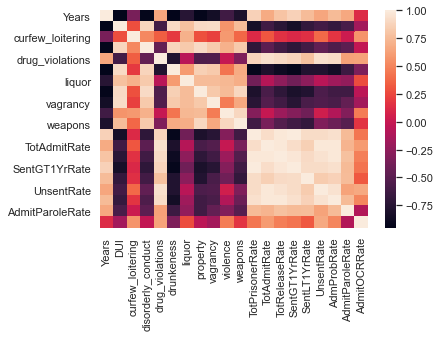

In [103]:
# Correlation matrix 
corr_subset = clean_df[['Years','DUI','curfew_loitering', 'disorderly_conduct', 
                       'drug_violations', 'drunkeness','liquor','property','vagrancy', 'violence', 'weapons',
                      'TotPrisonerRate', 'TotAdmitRate','TotReleaseRate', 'SentGT1YrRate','SentLT1YrRate', 'UnsentRate',
                       'AdmProbRate','AdmitParoleRate','AdmitOCRRate']]
correlation_matrix_clean_df = corr_subset.corr().round(2)
sns.heatmap(data=correlation_matrix_clean_df, annot=False)

<AxesSubplot:xlabel='Years', ylabel='TotAdmitRate'>

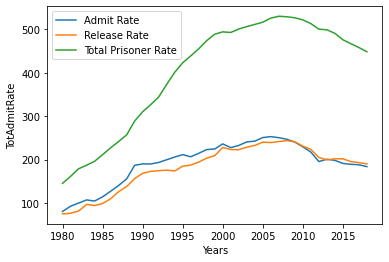

In [7]:
# Comparing Admit, Release Rate, Total Prisoner Rate

sns.lineplot(data=clean_df, x= "Years", y="TotAdmitRate", label="Admit Rate")
sns.lineplot(data=clean_df, x= "Years", y="TotReleaseRate", label="Release Rate")
sns.lineplot(data=clean_df, x= "Years", y="TotPrisonerRate", label="Total Prisoner Rate")

<AxesSubplot:xlabel='Years', ylabel='SentLT1YrRate'>

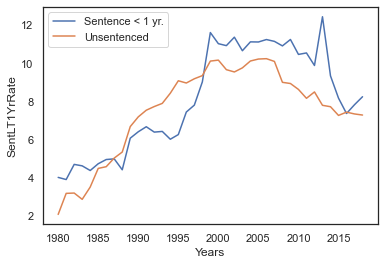

In [98]:
# Comparing number of short sentances to unsentenced prisoners.

sns.lineplot(data=clean_df, x= "Years", y="SentLT1YrRate", label="Sentence < 1 yr.")
sns.lineplot(data=clean_df, x= "Years", y="UnsentRate", label="Unsentenced")

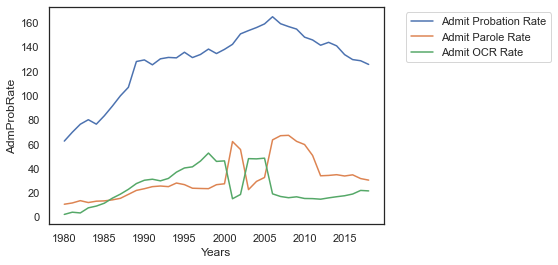

In [100]:

sns.lineplot(data=clean_df, x= "Years", y="AdmProbRate", label="Admit Probation Rate")
sns.lineplot(data=clean_df, x= "Years", y="AdmitParoleRate", label="Admit Parole Rate")
sns.lineplot(data=clean_df, x= "Years", y="AdmitOCRRate", label="Admit OCR Rate")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
Prison 

sns.lineplot(data=clean_df, x= "Years", y="SentLT1YrRate", label="Sentence < 1 yr.")
sns.lineplot(data=clean_df, x= "Years", y="UnsentRate", label="Unsentenced")

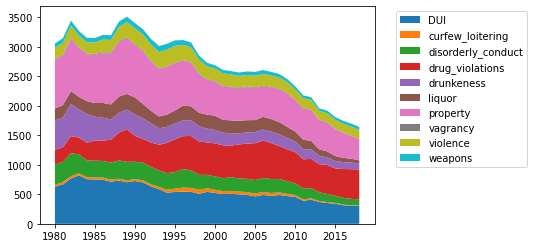

In [10]:
# Comparing relative amounts of each type of crime

y = [clean_df['DUI'], clean_df['curfew_loitering'], clean_df['disorderly_conduct'], clean_df['drug_violations'], clean_df['drunkeness'], clean_df['liquor'], 
     clean_df['property'], clean_df['vagrancy'], clean_df['violence'], clean_df['weapons']]
x = clean_df['Years']

plt.stackplot(x,y, labels = ['DUI','curfew_loitering', 'disorderly_conduct', 'drug_violations', 'drunkeness','liquor',
                             'property','vagrancy', 'violence', 'weapons'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [6]:
clean_df.describe()

,Years,TotalPrisoners,TotalAdmits,TotalReleases,TotalUSPop,DUI,curfew_loitering,disorderly_conduct,drug_violations,drunkeness,...,AdmitOCR,TotPrisonerRate,TotAdmitRate,TotReleaseRate,SentGT1YrRate,SentLT1YrRate,UnsentRate,AdmProbRate,AdmitParoleRate,AdmitOCRRate
count,39.000000,3.900000e+01,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1999.000000,1.147206e+06,542519.307692,516288.589744,2.775303e+08,545.730769,38.166667,244.210256,479.920513,267.269231,...,68794.307692,400.837761,191.708894,181.360507,385.200685,8.098547,7.546028,127.470611,31.509121,24.588341
std,11.401754,4.477226e+05,172297.151819,182949.149226,3.167955e+07,144.431015,15.773835,70.138160,106.287580,120.560586,...,39945.490730,127.657658,49.021108,51.617898,123.029289,2.699631,2.343083,27.449447,16.877365,14.289685
min,1980.000000,3.298210e+05,182617.000000,169826.000000,2.272247e+08,304.800000,6.700000,100.800000,244.000000,100.600000,...,4873.000000,145.151901,80.368457,74.739228,139.053533,3.904723,2.076799,62.546892,10.537586,2.144573
25%,1989.500000,7.431415e+05,467463.000000,402631.000000,2.482210e+08,466.850000,30.850000,215.850000,424.500000,186.800000,...,46661.000000,299.326535,185.179248,162.172797,286.156001,6.044677,6.934116,125.554584,22.257997,15.392908
50%,1999.000000,1.363686e+06,610561.000000,583013.000000,2.790402e+08,521.400000,36.900000,235.800000,502.500000,235.100000,...,56243.000000,458.039878,199.509394,193.968078,442.872655,7.827520,7.896319,133.776687,26.681474,18.932636
75%,2008.500000,1.526256e+06,667407.500000,644971.000000,3.054327e+08,683.800000,48.250000,293.600000,558.000000,338.350000,...,89981.000000,500.511492,228.322301,223.250745,481.451136,10.915861,9.268234,144.889459,34.512542,34.390797
max,2018.000000,1.615487e+06,754196.000000,740976.000000,3.268382e+08,821.700000,68.700000,386.600000,633.400000,544.800000,...,145342.000000,530.102779,252.763665,243.666788,508.968336,12.436565,10.238960,164.996027,67.305183,52.687996


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [12]:
# test on crime types
clean_df_model = ols("TotalPrisonersRate ~ DUI+curfew_loitering+disorderly_conduct+drug_violations+drunkeness+liquor+property+vagrancy+violence+weapons", data=clean_df).fit()
clean_df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalPrisoners   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     94.09
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           7.78e-19
Time:                        20:18:36   Log-Likelihood:                -493.19
No. Observations:                  39   AIC:                             1008.
Df Residuals:                      28   BIC:                             1027.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.799e+06   3.21e+05      5.612      0.000    1.14e+06    2.46e+06
DUI                   22.9671    544.259      0.042      0.967   -1091.897    1137.831
curfew_loitering     131.5728   2698.451      0.049      0.961   -5395.953    5659.098
disorderly_conduct  3032.9667   1192.313      2.544      0.017     590.624    5475.310
drug_violations      441.2012    512.840      0.860      0.397    -609.304    1491.706
drunkeness         -2723.5993    802.517     -3.394      0.002   -4367.480   -1079.718
liquor              -903.7310   1299.294     -0.696      0.492   -3565.214    1757.752
property           -1165.0938    490.057     -2.377      0.024   -2168.930    -161.257
vagrancy              1.2e+04   1.76e+04      0.681      0.501   -2.41e+04    4.81e+04
violence            3587.8961   1654.803      2.168      0.039     198.186    6977.606
weapons            -1.188e+04   4345.472     -2.735      0.011   -2.08e+04   -2981.740
==============================================================================
Omnibus:                        1.536   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.082
Skew:                           0.092   Prob(JB):                        0.582
Kurtosis:                       2.205   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""